# AMR-KG

This notebook is used to generate and populate the AMR-KG with the data.

In [1]:
from neomodel import config, db
from neomodel.integration.pandas import to_dataframe
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
sns.set_style("darkgrid")

# Generate graph
The graph can be generated and visualized using Neo4J desktop. Make sure to generate an admin user with the following configurations in the system setting of the database.
Username - user
Password - administrator

In [3]:
from neo4j import GraphDatabase

my_driver = GraphDatabase().driver(
    "bolt://localhost:7687", auth=("user", "administrator")
)
config.DRIVER = my_driver

# Statistics on the graph

In [4]:
nodes_df = to_dataframe(
    db.cypher_query("MATCH (n) RETURN labels(n)[0] AS node_type, count(n) AS num_nodes")
)
nodes_df

,node_type,num_nodes
0,Chemical,79796
1,Bacteria,1669
2,BacteriaStrain,4


In [5]:
edges_df = to_dataframe(
    db.cypher_query(
        "Match ()-[p]-() with type(p) as rel_type, count(p) as num_rels return rel_type, num_rels;"
    )
)
rel_name_mapper = {
    "SHOWS_ACTIVITY_ON": "chemical-bacteria",
    "IS_A": "bacteria-strain",
}
edges_df["rel_name"] = edges_df["rel_type"].apply(lambda x: rel_name_mapper[x])
edges_df

,rel_type,num_rels,rel_name
0,SHOWS_ACTIVITY_ON,842372,chemical-bacteria
1,IS_A,3340,bacteria-strain


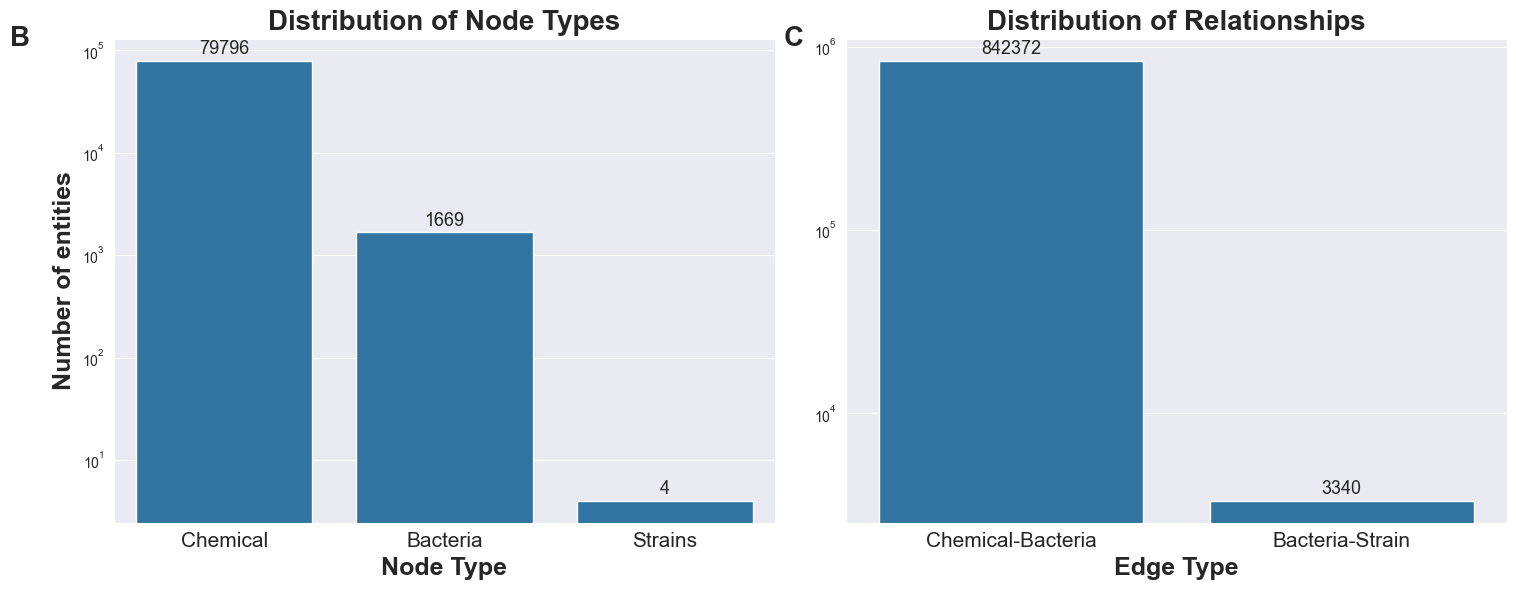

In [6]:
f, axis = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x="node_type", y="num_nodes", data=nodes_df, ax=axis[0])
for bars in axis[0].containers:
    axis[0].bar_label(bars, padding=2, fontsize=13)

sns.barplot(x="rel_name", y="num_rels", data=edges_df, ax=axis[1])
for bars in axis[1].containers:
    axis[1].bar_label(bars, padding=2, fontsize=13)

# title
axis[0].set_title("Distribution of Node Types", fontsize=20, fontweight="bold")
axis[1].set_title("Distribution of Relationships", fontsize=20, fontweight="bold")

# axis labels
axis[0].set_xlabel("Node Type", fontsize=18, fontweight="bold")
axis[0].set_ylabel("Number of entities", fontsize=18, fontweight="bold")
axis[1].set_xlabel("Edge Type", fontsize=18, fontweight="bold")
axis[1].set_ylabel("")

# axis ticks
axis[0].set_xticklabels(labels=["Chemical", "Bacteria", "Strains"], fontsize=15)
axis[1].set_xticklabels(labels=["Chemical-Bacteria", "Bacteria-Strain"], fontsize=15)

plt.tight_layout()
axis[0].set_yscale("log")  # the log transformation
axis[1].set_yscale("log")  # the log transformation

axis[0].text(
    -1.25,
    1,
    "B",
    size=20,
    weight="bold",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
)

axis[1].text(
    -0.08,
    1,
    "C",
    size=20,
    weight="bold",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
)

plt.savefig(
    "../figures/figure_2b.png",
    dpi=500,
    bbox_inches="tight",
)
plt.show()